### <center>Regresyon Özeti ve Varlık Fiyatlandırma Modelleri</center>
#### <center>Serkan Polat</center>

[Fama-Shiller Tartışması Bize Neler Öğretti?](https://hbr.org/2013/10/what-the-great-fama-shiller-debate-has-taught-us)

[Olgusal Varlık Fiyatlandırması: Eugene Fama, Lars Peter Hansen ve Robert Shiller](https://dash.harvard.edu/bitstream/handle/1/25142544/99130770.pdf)

[Fama-French Veri Kütüphanesi](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/index.html)

### Python'da Regresyon Modelleri


İşte lineer regresyon modelini tahmin etmek için kullanılabilecek popüler Python kütüphanelerinin bir listesi ve regresyonu gerçekleştirmek için tipik olarak kullanılan spesifik fonksiyon veya sınıf:

1. Statsmodels
    - Kütüphane: statsmodels
    - Fonksiyon/Sınıf: statsmodels.api.OLS()
      
        
2. Scikit-learn
    - Kütüphane: sklearn
    - Fonksiyon/Sınıf: sklearn.linear_model.LinearRegression()
    

3. NumPy

    - Kütüphane: numpy
    - Fonksiyon: numpy.polyfit() (with degree=1 for linear regression)
    

Bunlar sadece birkaç kütüphanedir ve başka kütüphaneler de mevcuttur (örneğin, TensorFlow (Keras API'yi Kullanarak), PyTorch, ...). Hangi kütüphaneyi kullanacağınız genellikle spesifik görevin gereksinimlerine, kütüphaneyle olan aşinalığınıza ve kişisel tercihinize bağlıdır.

### Teknik Analiz ve Ticarette Doğrusal Regresyon Göstergesi ve Regresyon Kanalları

Varlık fiyatlandırma modellerinin matematiksel ve açıklayıcı açıklamasını keşfetmeden önce, teknik analizde Yatırımcılar Linear Regression Indicator'ı (LRI) ve Regresyon Kanalları'nı nasıl kullandıklarına hızlıca bir göz atalım.

Teknik analiz alanının geniş dünyasında, Linear Regression Indicator ve Regresyon Kanalları, yatırımcılara hem trend yönü hem de bu trendin etrafındaki potansiyel volatilite hakkında bir bakış açısı sunan güçlü araçlar olarak öne çıkmaktadır. Bu araçlar çekirdeklerinde istatistiksel analizlere dayanmaktadır ve piyasa dinamiklerine nicel bir yaklaşım sağlamaktadır.


#### Regresyon kanalı

Kanallar, teknik analizde önemli bir bileşendir. Uygulanabilecek birkaç farklı kanal ticaret tekniği vardır. Bunlardan bazıları Fibonacci kanalı, Andrews pitchfork ve Keltner kanalıdır. Lineer regresyon kanalı, analiz edilen bir eğilimi veya fiyat hareketinin en yüksek, en düşük ve orta noktasını gösteren üç çizgili bir teknik indikatördür.

Üst Kanal Çizgisi (UCL) ve Alt Kanal Çizgisi (LCL):

Bunlar, LRL'nin sırasıyla yukarı ve aşağıda belirtilen bir sayı (genellikle iki) standart sapma çizilir. UCL ve LCL arasındaki alan, geçmiş volatilite ve trendine göre verilen varlık için beklenen hareket aralığını temsil eder. Fiyatlar bu kanalın dışına çıktığında, aşırı uzatma ve ortalamaya potansiyel bir dönüşü gösterebilir.

In [1]:
! pip install yfinance mplfinance pandas-ta> NUL


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%***********************]  1 of 1 completed


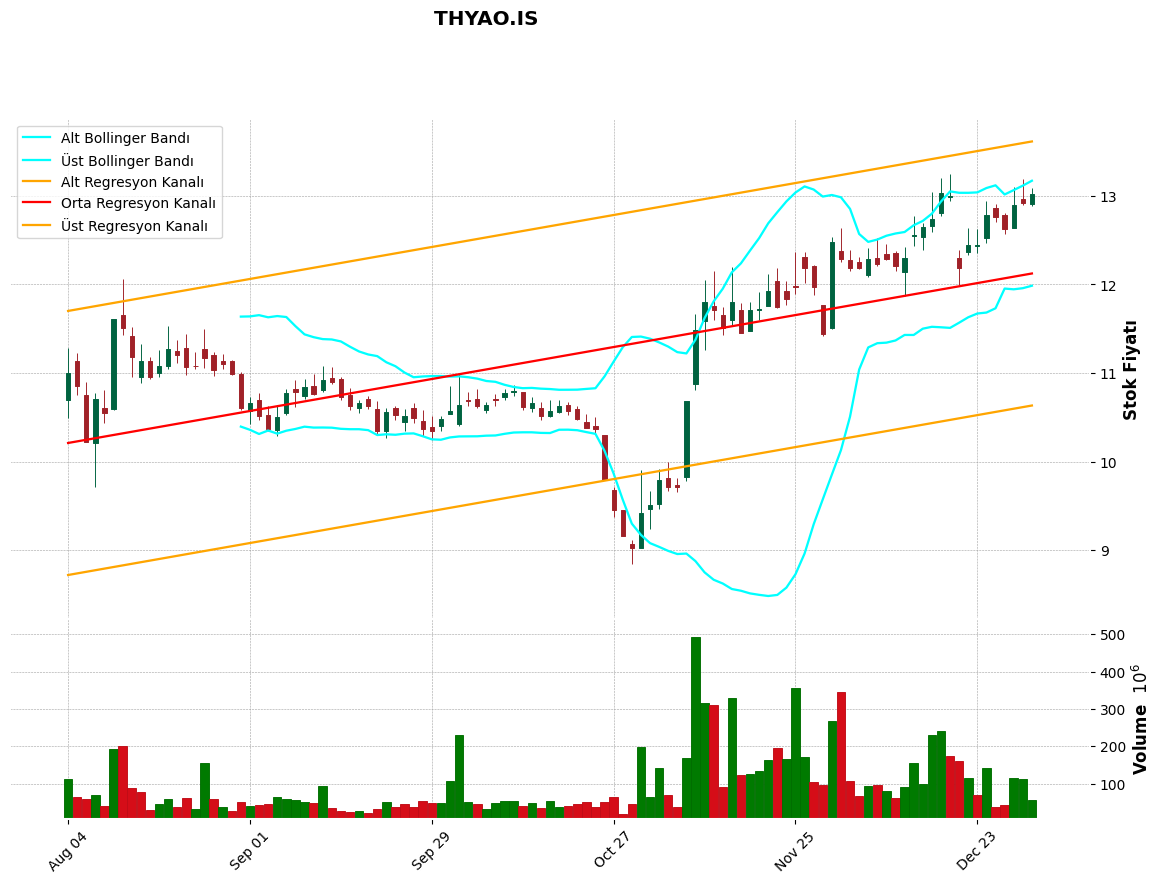

In [2]:

# Bollinger bandı ve regresyon kanalı birlikte işlem stratejileri geliştirmek için kullanılır.


import pandas as pd
import yfinance as yf
import mplfinance as mpf
import pandas_ta as ta
import numpy as np

# 1. NVIDIA hisse senedi verilerini al:
start_date = "2020-08-01"
end_date = "2021-01-01"
stock_symbol = "THYAO.IS"

data = yf.download(stock_symbol, start=start_date, end=end_date)

# 2. pandas-ta kullanarak Bollinger Bantlarını Hesapla:
data.ta.bbands(close='Close', length=20, append=True)

# 3. Regresyon Kanallarını Hesapla
x = np.array(range(len(data)))
y = data['Close'].values
slope, intercept = np.polyfit(x, y, 1)
data['Regression'] = slope*x + intercept

residuals = y - data['Regression']
std_error = np.std(residuals)

data['Upper Regression'] = data['Regression'] + (2 * std_error)
data['Lower Regression'] = data['Regression'] - (2 * std_error)

# 4. Bollinger Bantları ve Regresyon Kanalları ile mum grafiği grafiğini çizin:
ap = [
    mpf.make_addplot(data['BBL_20_2.0'].values, color='cyan', label='Alt Bollinger Bandı'),
    mpf.make_addplot(data['BBU_20_2.0'].values, color='cyan', label='Üst Bollinger Bandı'),
    mpf.make_addplot(data['Lower Regression'].values, color='orange', label='Alt Regresyon Kanalı'),
    mpf.make_addplot(data['Regression'].values, color='red', label='Orta Regresyon Kanalı'),
    mpf.make_addplot(data['Upper Regression'].values, color='orange', label='Üst Regresyon Kanalı')
]

mpf.plot(data, type='candle', style='charles', title=f"{stock_symbol} ",
         ylabel='Stok Fiyatı', addplot=ap, volume=True, figsize=(15,10))

#### Teknik Analizde Doğrusal Regresyon Göstergesi:

Doğrusal Regresyon Göstergesi, belirli sayıda çubuk için Doğrusal Regresyon Çizgisinin bitiş değerini çizer; İstatistiksel olarak fiyatın nerede olması beklendiğini gösterir. Örneğin, 20 dönemlik bir Doğrusal Regresyon Göstergesi, 50 çubuğu kapsayan bir Doğrusal Regresyon çizgisinin bitiş değerine eşit olacaktır. Doğrusal Regresyon Göstergesi (LRI) aşağıdaki formül kullanılarak hesaplanabilir:

LRI = (Doğrusal Regresyon Doğrusunun Bitiş Değeri) / (Çubuk Sayısı)

Doğrusal Regresyon Göstergesinin yorumu hareketli ortalamaya benzer, ancak hareketli ortalamaya göre avantajlıdır. Geçmiş fiyat hareketinin ortalamasını çizmek yerine, Doğrusal Regresyon Çizgisinin fiyatın nerede olmasını bekleyeceğini çizerek Doğrusal Regresyon Göstergesini hareketli ortalamaya göre daha duyarlı hale getirir.

[*********************100%***********************]  1 of 1 completed


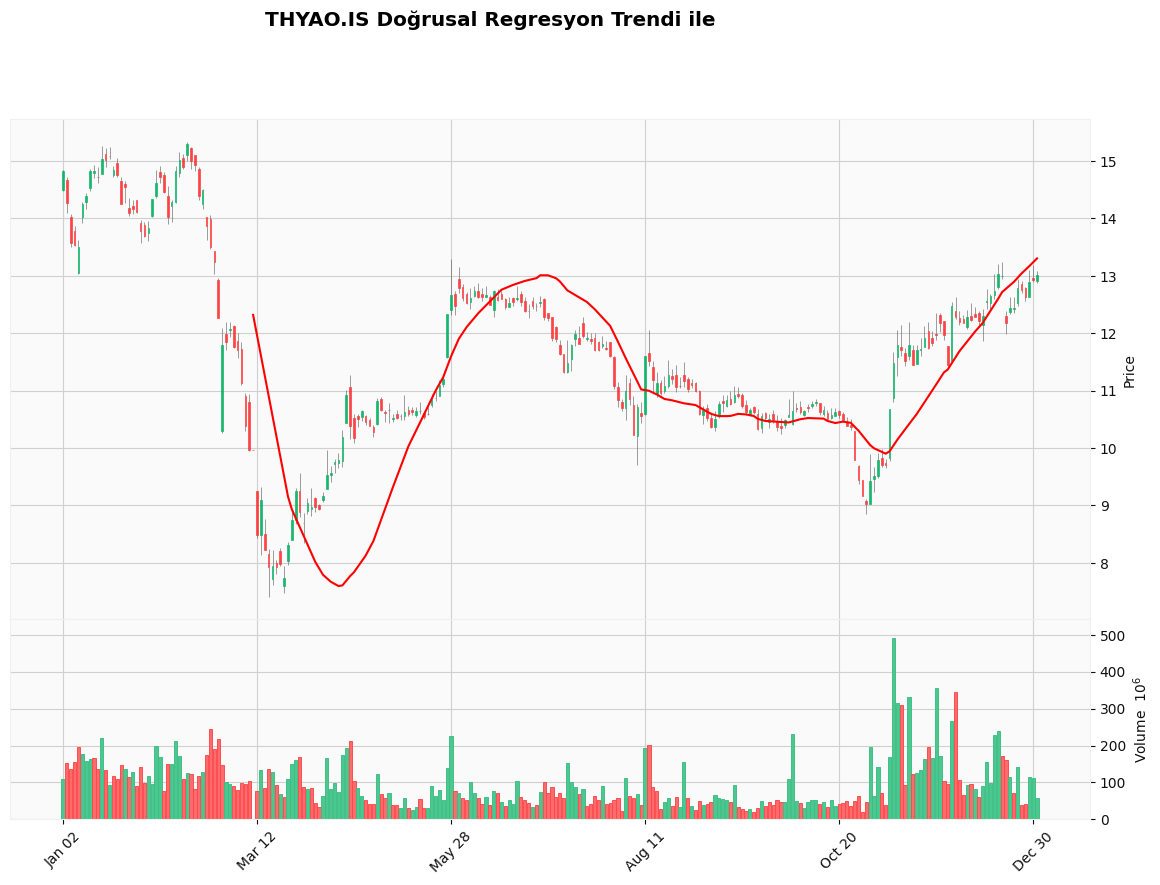

In [3]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import pandas_ta as ta

# 1. Hisse senedi verilerini getir:
start_date = "2020-01-01"
end_date = "2021-01-01"
stock_symbol = "THYAO.IS"

data = yf.download(stock_symbol, start=start_date, end=end_date)

# 2. Pandas-ta'yı kullanarak doğrusal regresyon eğilimini uygulayın:
linreg = ta.linreg(data["Close"],length=50)
data["LINREG"] = linreg

# Dizini ve LINREG sütununu numpy dizilerine dönüştürün
x_dates = data.index.to_numpy()
y_linreg = data["LINREG"].to_numpy()

# 3. Mum grafiğini regresyon eğilimiyle çizin:
ap = [
    mpf.make_addplot(y_linreg, color='red', width=1.5)
]

mpf.plot(data, type='candle', style='yahoo', addplot=ap, title=f"{stock_symbol} Doğrusal Regresyon Trendi ile", volume=True, figsize=(15,10))


Şimdi temel varlık fiyatlandırma modellerinin (örn. CAPM, Fama-French 3 Faktör, Fama-French 5 Faktör) matematiksel ve açıklayıcı tanımını ve bu modellerin Python'da nasıl çalıştırılacağını kısaca inceleyelim.

### Sermaye Varlıkları Fiyatlandırma Modeli (CAPM)

Tüm finans öğrencilerinin finansın en önemli konularından biri olan Sermaye Varlıkları Fiyatlandırma Modeli (CAPM) hakkında biraz bilgi sahibi olması gerekir. Sermaye Varlıkları Fiyatlandırma Modeli (CAPM), sistematik risk ile varlıkların, özellikle de hisse senetlerinin beklenen getirisi arasındaki ilişkiyi açıklar. CAPM, finans genelinde riskli menkul kıymetlerin fiyatlandırılması ve bu varlıkların riski ve sermaye maliyeti göz önüne alındığında varlıklar için beklenen getirilerin elde edilmesi amacıyla yaygın olarak kullanılmaktadır.

Riski göz önüne alındığında bir varlığın beklenen getirisinin hesaplanmasına ilişkin formül aşağıdaki gibidir:

### $ r_i = r_f + \beta_i (r_m − r_f)$

Neresi:


$r_i$ : i varlığına yapılan yatırımın beklenen getirisi. Bu, herhangi bir hisse senedinin (örn. Apple, Google, Tesla) veya yatırım portföyünün (örn. herhangi bir yatırım fonu/hedge fonu portföyü) getirisi olabilir.

$r_f$: Risksiz varlığın getirisi. Risksiz varlık genellikle ABD 3 aylık Hazine bonosu ile verilmektedir. ABD hükümetinin kısa vadeli devlet tahvili konusunda temerrüde düşmeyeceği varsayılıyor, dolayısıyla finans alanında ABD 3 aylık Hazine bonosunun risksiz olduğu yaygın biçimde varsayılıyor.

$r_m$ : Piyasanın getirisi. Bu genellikle dünyadaki en büyük piyasa endeksi olduğundan S&P500 getirisi ile verilir.

$(r_m − r_f)$ : Piyasa riski primi


Yatırımcılar risk ve paranın zaman değeri için tazminat almayı bekliyorlar. CAPM formülündeki risksiz faiz oranı paranın zaman değerini hesaba katar. CAPM formülünün diğer bileşenleri, yatırımcının ek risk almasını hesaba katar.

Potansiyel bir yatırımın betası, yatırımın piyasaya benzeyen bir portföye ne kadar risk katacağının bir ölçüsüdür. Bir hisse senedi piyasadan daha riskli ise betası birden büyük olacaktır. Bir hisse senedinin betası birden küçükse formül, bunun portföy riskini azaltacağını varsayar.

Bir beta katsayısı, tüm piyasanın sistematik riskine kıyasla bireysel bir hisse senedinin oynaklığını ölçebilir. İstatistiksel açıdan beta, veri noktalarının regresyonu yoluyla çizginin eğimini temsil eder. Finans alanında bu veri noktalarının her biri, bireysel bir hisse senedinin getirisini bir bütün olarak piyasanın getirilerine göre temsil eder.

Daha sonra bir hisse senedinin betası, piyasadan risksiz oranın üzerinde beklenen getiri olan piyasa risk primi ile çarpılır. Risksiz oran daha sonra hisse senedinin betası ile piyasa risk priminin çarpımına eklenir. Sonuç, yatırımcıya bir varlığın değerini bulmak için kullanabileceği gerekli getiri veya iskonto oranını vermelidir.

CAPM formülünün amacı, bir hisse senedinin riski ve paranın zaman değeri ile beklenen getirisi karşılaştırıldığında adil bir şekilde değerlenip değerlenmediğini değerlendirmektir.

### Faktör Yatırımı ve Fama-Fransız modeli

#### FF3 Faktör Varlık Fiyatlandırma Modeli

Fama ve Fransız Üç Faktör Modeli (veya kısaca Fama Fransız Modeli), 1992 yılında geliştirilen ve sermaye varlık fiyatlandırma modelini (CAPM) genişleten, piyasa riski faktörüne boyut riski ve değer riski faktörlerini ekleyen bir varlık fiyatlandırma modelidir. CAPM. Bu model, değerli ve küçük ölçekli hisse senetlerinin düzenli olarak piyasalardan daha iyi performans gösterdiği gerçeğini dikkate almaktadır. Bu iki ek faktörün dahil edilmesiyle model, bu üstün performans eğilimine uyum sağlıyor ve bunun da onu yönetici performansını değerlendirmek için daha iyi bir araç haline getirdiği düşünülüyor. Model esas olarak geçmiş hisse senedi fiyatlarının ekonometrik regresyonunun sonucudur.

Fama Fransız Modelinin Formülü:

### $ r_{it} - r_{ft} = \alpha_{it} + \beta_1 (r_{mt} − r_{ft}) + \beta_2 SMB_t + \beta_3 HML_t + \epsilon_{it}$

$SMB$ : Premium boyut (küçük eksi büyük)

$HML$ : Değer primi (Yüksek eksi düşük)

SMB, daha yüksek getiri sağlayan, küçük piyasa değeri olan, işlem gören şirketleri hesaba katarken, HML, piyasaya kıyasla daha yüksek getiri sağlayan, yüksek defter-piyasa oranlarına sahip değerli hisse senetlerini hesaba katıyor.


#### FF5 Faktör Varlık Fiyatlandırma Modeli

Beş faktörlü modelin teorik başlangıç ​​noktası, temettü indirimi modelidir çünkü model, bir hisse senedinin bugünkü değerinin gelecekteki temettülere bağlı olduğunu belirtir. Fama ve French, temettü indirimi modelini bundan iki yeni faktör elde etmek için kullanıyor: yatırım ve karlılık (Fama ve French, 2014).

### $ r_{it} - r_{ft} = \alpha_{it} + \beta_1 (r_{mt} − r_{ft}) + \beta_2 SMB_t + \beta_3 HML_t + \beta_4 RMW_t + \beta_5 CMA_t + \epsilon_{it}$

$RMW$ : En karlı firmaların getiri farkı eksi en az karlı olanlar

$CMA$ : Muhafazakar bir şekilde eksi agresif yatırım yapan firmaların getiri farkı


## İstatistik modelleriyle İstatistiksel Analiz

https://www.statsmodels.org

statsmodels geniş bir kesitsel model yelpazesinin yanı sıra bazı zaman serisi modelleri de sağlar. Temel doğrusal regresyon OLS tarafından sağlanır. Bir modelin tahmin edilmesi, modelin belirtilmesini ve ardından parametrelerin tahmin edilmesi için bir yöntemin çağrılmasını gerektirir (çoğu modelde uyum olarak adlandırılır).

In [4]:
! pip install yfinance > NUL
! pip install pandas-datareader --upgrade > NUL


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import yfinance as yf
import bs4 as bs
import numpy as np
import os
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as sm 
from statsmodels.iolib.summary2 import summary_col 
%matplotlib inline

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
### Geçmiş Hisse Senedi Fiyat Verileri

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2020,6,30)
tickers=tickers+["SPY"];

data = yf.download(tickers, start=start, end=end)['Adj Close']

print(data)

[*********************100%***********************]  504 of 504 completed

7 Failed downloads:
- KVUE: Data doesn't exist for startDate = 1136091600, endDate = 1593489600
- BF.B: No data found for this date range, symbol may be delisted
- VLTO: Data doesn't exist for startDate = 1136091600, endDate = 1593489600
- CEG: Data doesn't exist for startDate = 1136091600, endDate = 1593489600
- ABNB: Data doesn't exist for startDate = 1136091600, endDate = 1593489600
- GEHC: Data doesn't exist for startDate = 1136091600, endDate = 1593489600
- BRK.B: No timezone found, symbol may be delisted
                    A        AAL       AAPL       ABBV  ABNB        ABT  \
Date                                                                      
2006-01-03  20.359509  35.305664   2.265984        NaN   NaN  12.461275   
2006-01-04  20.414202  36.955471   2.272653        NaN   NaN  12.480174   
2006-01-05  20.949026  37.436260   2.254768        NaN   NaN  12.640870   
2006-01-06  21.058418  36.766918   

In [7]:
if not os.path.exists('Stock_Data'):
    os.makedirs('Stock_Data')
data.to_csv('Stock_Data/SP500Prices.csv')

#data.to_hdf('Stock_Data/SP500Prices.h5', 'fixed', mode='w', complib='blosc', complevel=9)

In [8]:
cleaned_data = data.copy()

# Tüm zaman aralığı için tüm eksik değerleri olan şirketleri (sütunları) kaldırın
cleaned_data.dropna(axis='columns', how='all', inplace=True)

# Tüm şirketler için eksik değerleri olan günleri (satırları) kaldırın
cleaned_data.dropna(axis='index', how='all', inplace=True)

# Son olarak, en az bir Nan (eksik değer) içeren sütunları kaldırın.
cleaned_data.dropna(axis='columns', how='any', inplace=True)

cleaned_data

,A,AAL,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,20.359509,35.305664,2.265984,12.461275,6.120000,21.361645,38.520000,23.738569,16.154079,23.871683,...,64.148216,13.280489,29.625666,9.664392,32.047997,23.868317,12.006148,60.232090,42.830002,56.404560
2006-01-04,20.414202,36.955471,2.272653,12.480174,6.151111,21.478294,38.419998,23.958483,17.174471,23.948973,...,64.814445,13.601346,29.570742,9.711228,32.102821,24.089207,12.108872,60.803806,42.410000,56.802811
2006-01-05,20.949026,37.436260,2.254768,12.640870,6.061111,21.638689,38.070000,24.721752,16.763662,23.748022,...,63.832672,13.481774,29.395025,9.706025,31.943857,23.815310,12.625069,60.161705,42.529999,57.319080
2006-01-06,21.058418,36.766918,2.312971,12.883475,6.173333,22.710419,39.000000,24.818766,17.260616,23.954121,...,63.061306,13.501704,29.675079,9.742455,32.574192,24.186396,12.589116,59.853867,44.119999,57.916454
2006-01-09,20.997644,36.399250,2.305392,13.362391,6.116667,22.644798,38.380001,25.168056,17.472633,23.892294,...,65.620918,13.469819,31.075371,9.716431,32.557732,24.424946,12.686709,61.973625,44.790001,57.437088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-23,87.246506,14.000000,89.843620,86.070015,29.559999,197.450180,440.549988,116.185257,37.053436,140.889587,...,184.708328,19.811760,84.096039,58.469990,39.540318,43.038147,82.886917,119.156647,260.769989,31.866991
2020-06-24,84.588455,13.040000,88.257698,82.299164,28.450001,192.156921,431.679993,112.621941,36.487373,135.572968,...,181.727951,18.924274,74.841599,58.005436,37.677597,41.202023,81.604767,111.834702,250.500000,29.837137
2020-06-25,85.272514,13.170000,89.429390,84.486244,28.879999,206.894302,436.950012,113.215836,37.071983,138.016006,...,189.783569,19.133093,73.199677,57.294949,38.244884,41.259846,81.076843,109.072433,253.639999,30.762243


In [9]:
# Bu, fiyatları aritmetik veya log getirilerine dönüştürür.

prices = cleaned_data.copy()
return_values = np.log(prices).diff().dropna()
print(return_values.shape)
return_values.head(10)

(3646, 413)


,A,AAL,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-04 00:00:00,0.002683,0.045670,0.002939,0.001515,0.005071,0.005446,-0.002599,0.009221,0.061251,0.003232,...,0.010332,0.023873,-0.001856,0.004835,0.001709,0.009212,0.008520,0.009447,-0.009855,0.007036
2006-01-05 00:00:00,0.025861,0.012926,-0.007901,0.012794,-0.014740,0.007440,-0.009152,0.031361,-0.024210,-0.008426,...,-0.015263,-0.008830,-0.005960,-0.000536,-0.004964,-0.011435,0.041746,-0.010616,0.002826,0.009048
2006-01-06 00:00:00,0.005208,-0.018041,0.025486,0.019010,0.018346,0.048341,0.024135,0.003917,0.029214,0.008641,...,-0.012158,0.001477,0.009482,0.003746,0.019540,0.015462,-0.002852,-0.005130,0.036703,0.010368
2006-01-09 00:00:00,-0.002890,-0.010050,-0.003282,0.036499,-0.009222,-0.002894,-0.016025,0.013976,0.012208,-0.002584,...,0.039787,-0.002364,0.046108,-0.002675,-0.000505,0.009815,0.007722,0.034803,0.015072,-0.008311
2006-01-10 00:00:00,0.012940,-0.021202,0.061328,-0.009714,0.006338,-0.021807,0.005975,0.000000,-0.006467,-0.008228,...,-0.010204,0.013228,0.001236,0.004809,0.007714,-0.008537,-0.000810,-0.004267,0.036607,-0.011754
2006-01-11 00:00:00,-0.000286,-0.082692,0.036907,-0.007095,0.003424,0.008193,0.018476,0.004871,0.021149,0.003039,...,-0.004600,-0.000585,0.029562,-0.007491,0.006826,0.022724,-0.008054,0.025749,-0.009516,0.005830
2006-01-12 00:00:00,-0.022252,0.005445,0.004637,-0.002175,-0.008128,-0.001633,0.003807,-0.008475,0.011888,-0.014851,...,0.017471,-0.017686,-0.009469,0.010152,-0.010508,-0.001606,-0.016304,0.005955,0.010591,-0.015228
2006-01-13 00:00:00,-0.007627,-0.027232,0.015305,-0.003635,-0.005820,-0.012500,-0.016344,0.006427,-0.010767,0.006579,...,-0.004808,-0.011516,0.009297,0.000532,0.022055,0.004988,-0.000208,-0.025453,-0.007554,0.010308
2006-01-17 00:00:00,-0.005907,-0.126633,-0.010335,-0.002918,-0.016183,0.020640,0.015330,-0.031236,-0.000373,-0.009223,...,-0.014563,0.001053,-0.025164,0.011097,0.009306,-0.004096,-0.012355,0.001416,-0.020132,-0.004814


In [10]:
def assetPriceReg(df_stk):
    import pandas_datareader.data as web  
    
    df_factors = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench')[0]
    df_factors.rename(columns={'Mkt-RF': 'MKT'}, inplace=True)
    df_factors['MKT'] = df_factors['MKT']/100
    df_factors['SMB'] = df_factors['SMB']/100
    df_factors['HML'] = df_factors['HML']/100
    df_factors['RMW'] = df_factors['RMW']/100
    df_factors['CMA'] = df_factors['CMA']/100
    
    df_stock_factor = pd.merge(df_stk,df_factors,left_index=True,right_index=True) # Merging the stock and factor returns dataframes together
    df_stock_factor['XsRet'] = df_stock_factor['Returns'] - df_stock_factor['RF'] # Calculating excess returns

    # CAPM, FF3 ve FF5 modellerini çalıştırmak.
    CAPM = sm.ols(formula = 'XsRet ~ MKT', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    FF3 = sm.ols( formula = 'XsRet ~ MKT + SMB + HML', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    FF5 = sm.ols( formula = 'XsRet ~ MKT + SMB + HML + RMW + CMA', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})

    CAPMtstat = CAPM.tvalues
    FF3tstat = FF3.tvalues
    FF5tstat = FF5.tvalues

    CAPMcoeff = CAPM.params
    FF3coeff = FF3.params
    FF5coeff = FF5.params

    # Katsayılar ve t istatistikleri içeren DataFrame
    results_df = pd.DataFrame({'CAPMcoeff':CAPMcoeff,'CAPMtstat':CAPMtstat,
                               'FF3coeff':FF3coeff, 'FF3tstat':FF3tstat,
                               'FF5coeff':FF5coeff, 'FF5tstat':FF5tstat},
    index = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])


    dfoutput = summary_col([CAPM,FF3, FF5],stars=True,float_format='%0.4f',
                  model_names=['CAPM','FF3','FF5'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'Adjusted R2':lambda x: "{:.4f}".format(x.rsquared_adj)}, 
                             regressor_order = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])

    print(dfoutput)
    
    return results_df

In [11]:
df_stk = yf.download('NVDA', start=start, end=end)
df_stk.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,3.064167,3.208333,3.054167,3.185000,2.922002,47281200
2006-01-04,3.209167,3.279167,3.175833,3.274167,3.003805,51007200
2006-01-05,3.275000,3.354167,3.269167,3.348333,3.071848,64609200
2006-01-06,3.386667,3.415833,3.254167,3.403333,3.122306,62338800
2006-01-09,3.401667,3.516667,3.394167,3.498333,3.209462,56048400


<Axes: xlabel='Date'>

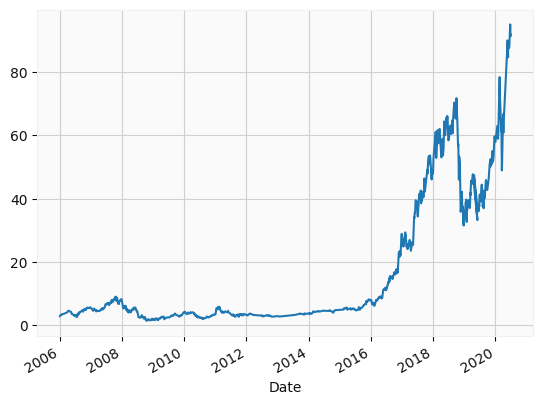

In [12]:
df_stk.drop(['Volume'],axis=1,inplace=True)
df_stk['Adj Close'].plot()

In [13]:
df_stk['Returns'] = np.log(df_stk[['Adj Close']]).diff().dropna()
df_stk.head()

,Open,High,Low,Close,Adj Close,Returns
Date,,,,,,
2006-01-03,3.064167,3.208333,3.054167,3.185000,2.922002,NaN
2006-01-04,3.209167,3.279167,3.175833,3.274167,3.003805,0.027611
2006-01-05,3.275000,3.354167,3.269167,3.348333,3.071848,0.022400
2006-01-06,3.386667,3.415833,3.254167,3.403333,3.122306,0.016292
2006-01-09,3.401667,3.516667,3.394167,3.498333,3.209462,0.027532


<Axes: xlabel='Date'>

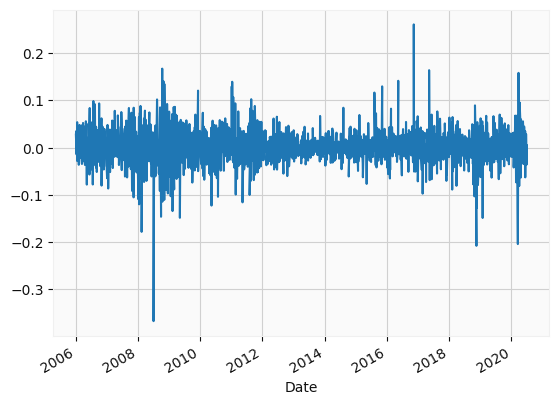

In [14]:
df_stk['Returns'].plot()

<Axes: >

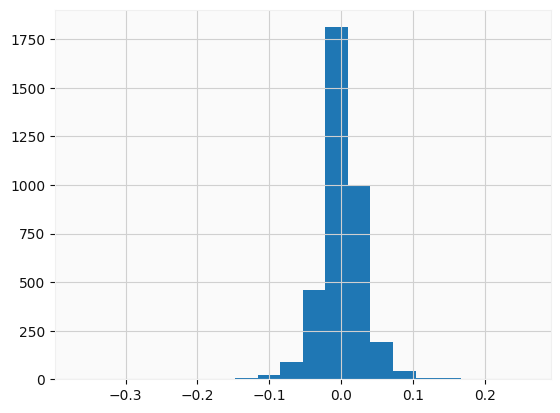

In [15]:
df_stk['Returns'].hist(bins=20)

In [16]:
df_stk['Returns'].describe()

count    3646.000000
mean        0.000945
std         0.030545
min        -0.367109
25%        -0.013310
50%         0.001139
75%         0.015712
max         0.260876
Name: Returns, dtype: float64

In [17]:
df_regOutput = assetPriceReg(df_stk)


                  CAPM       FF3        FF5    
-----------------------------------------------
Intercept      -0.0063*** -0.0071*** -0.0073***
               (0.0012)   (0.0012)   (0.0012)  
MKT            1.4627***  1.5951***  1.4682*** 
               (0.0681)   (0.0648)   (0.0682)  
SMB                       0.5790***  0.3814*** 
                          (0.1242)   (0.1202)  
HML                       -1.0244*** -0.8010***
                          (0.1169)   (0.1182)  
RMW                                  0.7138*   
                                     (0.3657)  
CMA                                  -1.5676***
                                     (0.4394)  
R-squared      0.5329     0.6033     0.6222    
R-squared Adj. 0.5317     0.6004     0.6176    
N              416        416        416       
Adjusted R2    0.5317     0.6004     0.6176    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [18]:
    import pandas_datareader.data as web  
    
    # Faktör verilerinin okunması
    df_factors = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench')[0]
    df_factors.rename(columns={'Mkt-RF': 'MKT'}, inplace=True)
    df_factors['MKT'] = df_factors['MKT']/100
    df_factors['SMB'] = df_factors['SMB']/100
    df_factors['HML'] = df_factors['HML']/100
    df_factors['RMW'] = df_factors['RMW']/100
    df_factors['CMA'] = df_factors['CMA']/100
    
    df_stock_factor = pd.merge(df_stk,df_factors,left_index=True,right_index=True) # Hisse senedi ve faktör getirisi veri çerçevelerinin bir araya getirilmesi
    df_stock_factor['XsRet'] = df_stock_factor['Returns'] - df_stock_factor['RF'] # Fazla getirilerin hesaplanması

    # CAPM, FF3 ve FF5 modellerini çalıştırmak.
    FF5 = sm.ols( formula = 'XsRet ~ MKT + SMB + HML + RMW + CMA', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})

In [19]:
FF5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  XsRet   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     135.3
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.93e-84
Time:                        09:59:52   Log-Likelihood:                 999.28
No. Observations:                 416   AIC:                            -1987.
Df Residuals:                     410   BIC:                            -1962.
Df Model:                           5                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0073      0.001     -6.341      0.000      -0.010      -0.005
MKT            1.4682      0.068     21.525      0.000       1.335       1.602
SMB            0.3814      0.120      3.174      0.002       0.146       0.617
HML           -0.8010      0.118     -6.779      0.000      -1.033      -0.569
RMW            0.7138      0.366      1.952      0.051      -0.003       1.431
CMA           -1.5676      0.439     -3.567      0.000      -2.429      -0.706
==============================================================================
Omnibus:                      270.032   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7266.457
Skew:                          -2.291   Prob(JB):                         0.00
Kurtosis:                      22.956   Cond. No.                         379.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

## Parametre Terminolojisi

Genel olarak β katsayılarının altında yatan gerçek değerleri bilmiyoruz. Bilinmeyen β parametresinin tahminini $\widehat{\beta}$ olarak göstereceğiz.

$\widehat{\beta}$ hakkında iki şekilde konuşabileceğimizi not ediyoruz:

- Somut bir tahmini değer olarak veya daha genel olarak sonuç olarak $\widehat{\beta}$. Daha sonra $\widehat{\beta}$'ın gözlemlenen veri örneğine dayalı bir β tahmini olduğunu söyleriz;

- Rastgele bir değişken olarak $\widehat{\beta}$ veya daha genel olarak, gözlemlenen verilere dayalı bir tahminin hesaplanmasına yönelik bir kural olarak. O zaman $\widehat{\beta}$'ın β'nın bir tahmincisi olduğunu söyleriz.

Tahminci olarak $\widehat{\beta}$'dan bahsettiğimizde, onun ortalamasından da bahsedebiliriz., $\mathbb{E}(\widehat{\beta}_1)$ , variance $\mathbb{V}{\rm ar}(\widehat{\beta}_1)$ ve dağılım, belirli bir tahmin yönteminin alternatif bir tahmin yönteminden daha iyi olup olmadığının belirlenmesinde çok önemlidir.

## OLS tahmincisinin özellikleri

OLS tahmincilerinin yapısından itibaren aşağıdaki özellikler numuneye uygulanır:

1. OLS artıklarının toplamı (ve buna bağlı olarak örnek ortalaması) sıfırdır:

$\begin{equation}
\sum_{i = 1}^N \widehat{\epsilon}_i = 0
\end{equation}$


<Axes: xlabel='Date'>

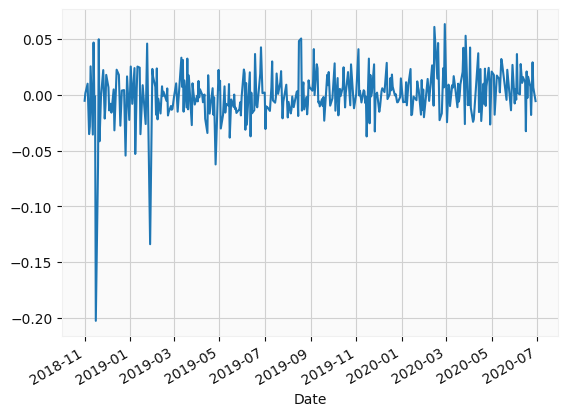

In [20]:
FF5.resid.plot()

In [21]:
FF5.resid.mean()

-7.24340459407485e-15

2. Regresörler ve OLS artıkları arasındaki örnek kovaryans sıfırdır:

$\begin{equation}
\sum_{i = 1}^N X_i \widehat{\epsilon}_i = 0
\end{equation}$

In [22]:
sum(FF5.resid.values * df_stock_factor['MKT'].values)

-1.5419252246545723e-15

In [23]:
np.cov(FF5.resid.values, df_stock_factor['MKT'].values)

array([[ 4.80972975e-04, -4.09645544e-19],
       [-4.09645544e-19,  3.17060928e-04]])

Hem toplamın hem de örneklem kovaryansının sıfıra çok yakın olduğunu görüyoruz.

In [24]:
FF5.bse

# Not: bse'deki b, β parametre vektörünü ve se - standart hataları temsil eder.

Intercept    0.001156
MKT          0.068210
SMB          0.120181
HML          0.118157
RMW          0.365682
CMA          0.439419
dtype: float64

## Güvenilirlik aralığı

Bu bölümde, bilinmeyen parametrelerin muhtemelen yer aldığı, güven aralıkları adı verilen değer aralıklarını oluşturmaya yönelik bir prosedür olan aralık tahmini kavramını tanıtacağız. Güven aralığı oluşturma prosedürleri büyük ölçüde (UR.4) varsayımına dayanır.

In [25]:
FF5.conf_int()

,0,1
Intercept,-0.009595,-0.005064
MKT,1.334553,1.601930
SMB,0.145874,0.616974
HML,-1.032558,-0.569391
RMW,-0.002922,1.430524
CMA,-2.428854,-0.706362


## Hipotez testi

pratikte genellikle belirli değişkenlerin etkilerine ilişkin çok spesifik soruları yanıtlamak isteriz:

Gelir harcamayı etkiler mi?
Eğitimde daha fazla yıl ücret artışına yol açar mı?
Hipotez testleri, bu tür evet/hayır sorularını yanıtlamak için örnek verilerdeki bir parametre hakkındaki bilgileri kullanır (her ne kadar bu kadar güçlü bir kesinlik olmasa da).

In [26]:
FF5.pvalues

Intercept     2.276244e-10
MKT          9.005489e-103
SMB           1.504833e-03
HML           1.210983e-11
RMW           5.094128e-02
CMA           3.604657e-04
dtype: float64

In [27]:
FF5.rsquared

0.6221801128864791

In [28]:
FF5.rsquared_adj

0.6175725532875338

In [29]:
#!pip uninstall statsmodels
#!pip install statsmodels


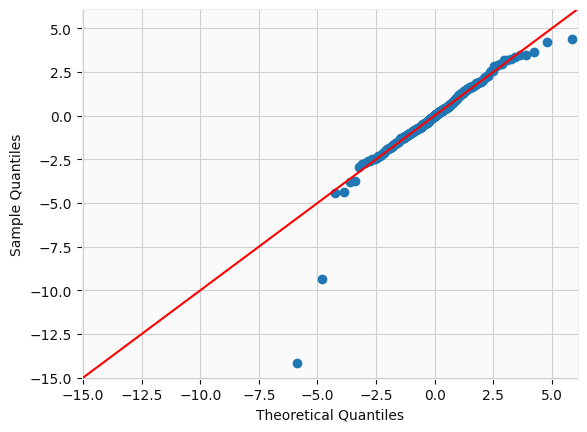

In [30]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import scipy.stats as stats

fig = sm.qqplot(FF5.resid.values, stats.t, distargs=(6,), fit=True, line="45")
plt.show()


## Kalan Heteroskedastisite
<div class="TEOREM">
<p>
Heteroskedastisitenin sonuçları şunlardır:
</p>
<ul>
<li>
OLS parametreleri <strong>biased (yanlı)</strong> kalmaya devam eder;
</li>
<li>
OLS tahminleri artık verimli (yani, en küçük varyansa sahip değiller) değildir. Bunun nedeni, OLS'nin verilerdeki tüm gözlemlere eşit ağırlık vermesidir, halbuki daha büyük hata varyansına sahip gözlemlerin, daha küçük hata varyansına sahip gözlemlere göre daha az bilgi içerdiğidir;
</li>
<li>
Kalanların varyans tahmini <strong>biased (yanlı)</strong> ve bu da standart hataları <strong>biased (yanlı)</strong> yapar. Bu da sınav istatistiklerinde ve güven aralıklarında bir yanlılığa yol açar.
</li>
<li>
Standart hata yanlılığı nedeniyle, tahmin edilen modelde  olup olmadığına dair null hipotezini reddedemeyebiliriz, oysa ki null hipotezinin gerçekte yanlış olduğu durumlarda (yani, Tip II hata yapma).
</li>
</ul>
<p>
Heteroskedastisiteyi hesaba katmak için birkaç düzeltme seçeneği bulunmaktadır:
</p>
<ul>
<li>
Verilerin logaritmasını almak, verileri <strong>lineerleştirmeye</strong> yardımcı olabilir;
</li>
<li>
Farklı bir tahmin yöntemi uygulamak. Bu konuyu ilerleyen bölümlerde ele alacağız, ancak farklı gözlemlere farklı ağırlıklar veren bir <strong>Ağırlıklı En Küçük Kareler (Weighted Least Squares)</strong> tahmin yöntemi kullanmak, sabit olmayan varyansı hesaba katmayı sağlar;
</li>
<li>
Heteroskedastisite için standart hataları düzeltebiliriz. Bu, OLS tahminlerini değiştirmeyecektir. <a href="https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors">White'ın heteroskedastisite-uyumlu standart hataları</a> (veya sağlam standart hatalar), tutarlı bir varyans tahmincisini sunar.
</li>
</ul>
</div>

In [31]:
import statsmodels.stats.diagnostic as sm_diagnostic

# Breusch–Pagan Test
sm_diagnostic.het_breuschpagan(resid = FF5.resid.values, exog_het = sm.add_constant(FF5.resid.values))

(99.43283378266895,
 2.0293018286434008e-23,
 130.0362058324269,
 2.212136904634685e-26)

In [32]:
# White Test
print(sm_diagnostic.het_white(resid = FF5.resid.values, exog = sm.add_constant(FF5.resid.values)))

(416.0, 4.642455656042647e-91, 5.618401135806846e+28, 0.0)


In [33]:
from statsmodels.stats.stattools import durbin_watson
# Durbin–Watson Test
print(durbin_watson(FF5.resid.values))

1.8765101809660738


In [34]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
# Breusch-Godfrey Test
print(acorr_breusch_godfrey(FF5, nlags = 2))

(3.2147669171351474, 0.20041131314056948, 1.588749786899281, 0.20544125737769384)
